In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv("/Users/ngl/Downloads/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Initial theta0: 0.0
Initial theta1 (age): 0.0
Initial theta2 (bmi): 0.0
Learning rate: 1e-05
Epochs: 200
Initial Cost: 161323436.79435238

Epoch 0, Cost: 161323436.7944
Epoch 50, Cost: 72056995.1770
Epoch 100, Cost: 65820343.7111
Epoch 150, Cost: 65384015.0044
Epoch 199, Cost: 65353072.9763

Final theta0: 4.729033120282654
Final theta1 (age): 215.2895709200326
Final theta2 (bmi): 161.27282613945636
Final Cost: 65353072.97627981


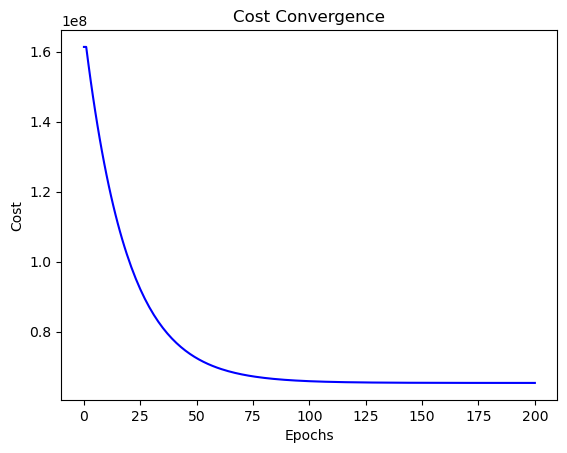

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Features (age, bmi)
X1 = df["age"].values
X2 = df["bmi"].values
y = df["charges"].values
m = len(y)

theta0 = 0.0 
theta1 = 0.0 #age
theta2 = 0.0 #bmi

learning_rate = 0.00001
epochs = 200

# Initial predictions
y_hat = theta0 + theta1 * X1 + theta2 * X2
errors = y_hat - y
J = np.dot(errors, errors) / (2 * m)

print("Initial theta0:", theta0)
print("Initial theta1 (age):", theta1)
print("Initial theta2 (bmi):", theta2)
print("Learning rate:", learning_rate)
print("Epochs:", epochs)
print("Initial Cost:", J)
print()

costs = [J]
thetas = [[theta0, theta1, theta2]]

# gradient descent
for epoch in range(epochs):
    y_hat = theta0 + theta1 * X1 + theta2 * X2
    errors = y_hat - y

    newtheta0 = (1/m) * np.sum(errors)
    newtheta1 = (1/m) * np.sum(errors * X1)
    newtheta2 = (1/m) * np.sum(errors * X2)

    theta0 -= learning_rate * newtheta0
    theta1 -= learning_rate * newtheta1
    theta2 -= learning_rate * newtheta2

    thetas.append([theta0, theta1, theta2]) # this is for the graphs
    
    # New cost
    J = np.dot(errors, errors) / (2 * m)
    costs.append(J)
    
    # Update every 50 epochs
    if epoch % 50 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}, Cost: {J:.4f}")

print()
print("Final theta0:", theta0)
print("Final theta1 (age):", theta1)
print("Final theta2 (bmi):", theta2)
print("Final Cost:", costs[-1])

# Cost vs epochs
plt.plot(range(epochs+1), costs, color="blue")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.show()

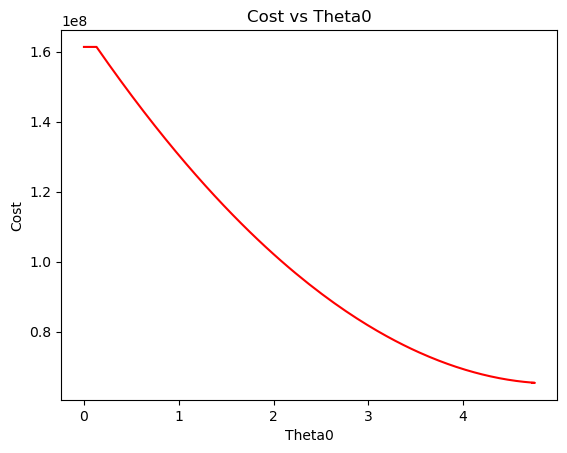

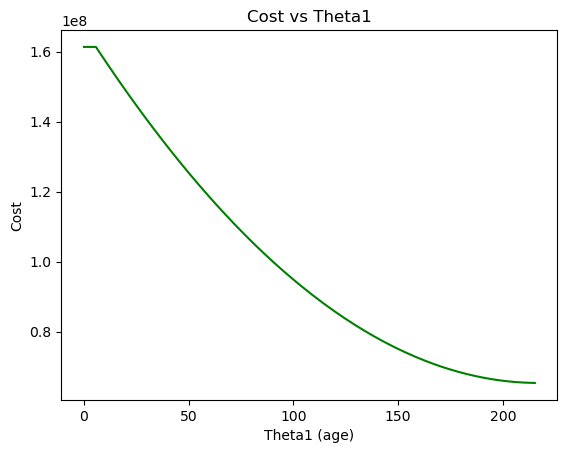

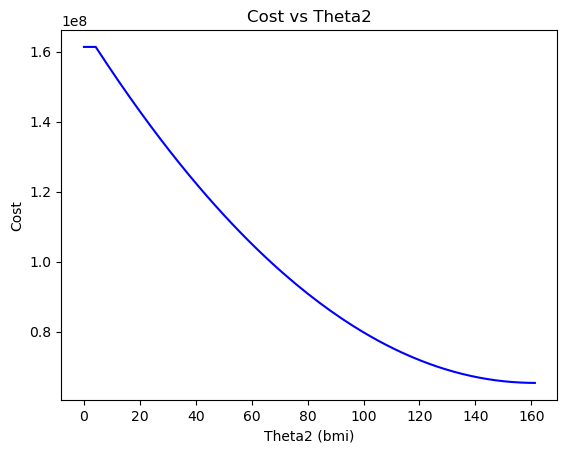

In [38]:
#theta0
plt.plot([t[0] for t in thetas], costs, color="red")
plt.xlabel("Theta0")
plt.ylabel("Cost")
plt.title("Cost vs Theta0")
plt.show()

#theta1
plt.plot([t[1] for t in thetas], costs, color="green")
plt.xlabel("Theta1 (age)")
plt.ylabel("Cost")
plt.title("Cost vs Theta1")
plt.show()

#theta2
plt.plot([t[2] for t in thetas], costs, color="blue")
plt.xlabel("Theta2 (bmi)")
plt.ylabel("Cost")
plt.title("Cost vs Theta2")
plt.show()